In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random 1500 latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
#let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [8]:
#pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=c7aff5620aea9a7c69ea211ddffd801114d33112bbbc469f7d9487ef92fb2dcc
  Stored in directory: c:\users\renat\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [16]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

601

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#The config.py file should be in the same folder as this API_practice.ipynb file

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

## Loop through all the cities in our list.
#for i in range(len(cities)):

    ## Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    ## Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

#Instead of using two for loops, we can use the enumerate() method 
#as an alternative way to iterate through the list of cities 
#and retrieve both the index, and the city from the list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):   #check if the remainder of the index divided by 50 is equal to 0 and and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") #removing the blank spaces in the city name and concatenating the city name with +

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-omchug
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | biloela
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | san lorenzo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | siraha
Processing Record 15 of Set 1 | brae
Processing Record 16 of Set 1 | yzeure
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | solhan
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | ghatanji
Processing Record 22 of Set 1 | dicabisagan
Processing Recor

Processing Record 40 of Set 4 | tabou
Processing Record 41 of Set 4 | burica
City not found. Skipping...
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | ambulu
Processing Record 47 of Set 4 | ticuantepe
Processing Record 48 of Set 4 | cedar city
Processing Record 49 of Set 4 | necochea
Processing Record 50 of Set 4 | todos santos
Processing Record 1 of Set 5 | ilovita
Processing Record 2 of Set 5 | fort erie
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | haibowan
City not found. Skipping...
Processing Record 6 of Set 5 | uporovo
Processing Record 7 of Set 5 | xining
Processing Record 8 of Set 5 | mandalgovi
Processing Record 9 of Set 5 | det udom
Processing Record 10 of Set 5 | ishigaki
Processing Record 11 of Set 5 | dingle
Processing Record 12 of Set 5 | goderich
Proces

Processing Record 33 of Set 8 | orlik
Processing Record 34 of Set 8 | victoria
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | tasiilaq
Processing Record 37 of Set 8 | abu kamal
Processing Record 38 of Set 8 | atar
Processing Record 39 of Set 8 | berbera
Processing Record 40 of Set 8 | grafton
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | russellville
Processing Record 43 of Set 8 | kristiansund
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | nabire
Processing Record 46 of Set 8 | samfya
Processing Record 47 of Set 8 | jiddah
City not found. Skipping...
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | marzuq
Processing Record 50 of Set 8 | namibe
Processing Record 1 of Set 9 | anloga
Processing Record 2 of Set 9 | tacoronte
Processing Record 3 of Set 9 | rawah
Processing Record 4 of Set 9 | shenzhen
Processing Record 5 of Set 9 | saint-pierre
Processing Record 6 of Set 9 | qasigiannguit
Processing Re

Processing Record 19 of Set 12 | belmonte
Processing Record 20 of Set 12 | eisenerz
Processing Record 21 of Set 12 | mackay
Processing Record 22 of Set 12 | sesimbra
Processing Record 23 of Set 12 | erzin
Processing Record 24 of Set 12 | ulety
Processing Record 25 of Set 12 | gladstone
Processing Record 26 of Set 12 | araouane
Processing Record 27 of Set 12 | starodub
Processing Record 28 of Set 12 | zhigansk
Processing Record 29 of Set 12 | cayenne
Processing Record 30 of Set 12 | mehamn
Processing Record 31 of Set 12 | surt
Processing Record 32 of Set 12 | timra
Processing Record 33 of Set 12 | corn island
Processing Record 34 of Set 12 | iberia
Processing Record 35 of Set 12 | haines junction
Processing Record 36 of Set 12 | north platte
Processing Record 37 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 12 | verkhnevilyuysk
Processing Record 39 of Set 12 | haddonfield
Processing Record 40 of Set 12 | atherton
Processing Record 41 of Set 12 | nador
Proc

In [28]:
# Print the city_data count to confirm sufficient count.
len(city_data)

552

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Omchug,61.1500,149.6333,-26.23,78,100,9.33,RU,2021-01-18 22:26:37
1,Chokurdakh,70.6333,147.9167,-32.67,84,6,2.42,RU,2021-01-18 22:24:08
2,Cape Town,-33.9258,18.4232,69.01,88,0,13.80,ZA,2021-01-18 22:23:43
3,Longyearbyen,78.2186,15.6401,17.60,67,20,27.63,SJ,2021-01-18 22:26:30
4,Kapaa,22.0752,-159.3190,71.60,73,75,29.93,US,2021-01-18 22:26:38
5,Biloela,-24.4167,150.5000,78.48,65,77,7.96,AU,2021-01-18 22:26:38
6,Albany,42.6001,-73.9662,33.01,63,99,3.00,US,2021-01-18 22:26:38
7,Port Alfred,-33.5906,26.8910,66.99,91,43,3.00,ZA,2021-01-18 22:26:38
8,Hobart,-42.8794,147.3294,55.00,50,75,17.27,AU,2021-01-18 22:22:22
9,Lebu,-37.6167,-73.6500,62.44,79,0,23.89,CL,2021-01-18 22:26:38


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [35]:
city_data_df = city_data_df[new_column_order]

In [36]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Omchug,RU,2021-01-18 22:26:37,61.1500,149.6333,-26.23,78,100,9.33
1,Chokurdakh,RU,2021-01-18 22:24:08,70.6333,147.9167,-32.67,84,6,2.42
2,Cape Town,ZA,2021-01-18 22:23:43,-33.9258,18.4232,69.01,88,0,13.80
3,Longyearbyen,SJ,2021-01-18 22:26:30,78.2186,15.6401,17.60,67,20,27.63
4,Kapaa,US,2021-01-18 22:26:38,22.0752,-159.3190,71.60,73,75,29.93
...,...,...,...,...,...,...,...,...,...
547,Itarema,BR,2021-01-18 22:27:46,-2.9248,-39.9167,80.01,78,91,11.92
548,Palmer,US,2021-01-18 22:27:46,42.1584,-72.3287,37.99,56,75,12.66
549,Ahuimanu,US,2021-01-18 22:25:53,21.4447,-157.8378,73.40,83,90,31.07
550,Elbistan,TR,2021-01-18 22:27:46,38.2059,37.1983,20.21,92,95,2.01


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
#Retrieve the data needed to create scatter plots: latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

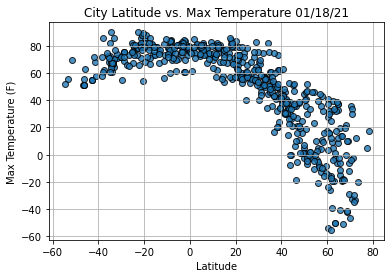

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

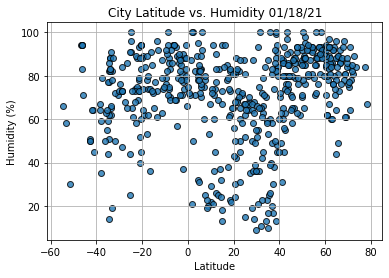

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

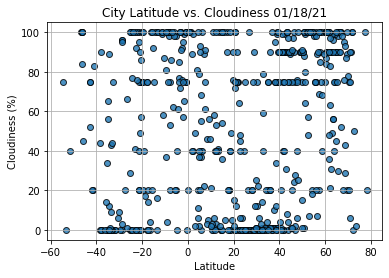

In [41]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

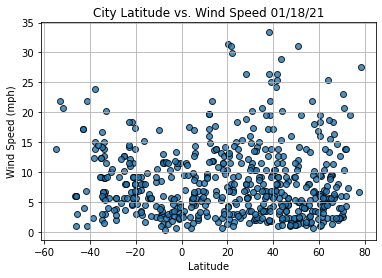

In [42]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()